In [16]:
import numpy as np
import pandas as pd

In [17]:
dataset=pd.read_csv("Tweets.csv")

In [18]:
dataset.head(50)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [19]:
dataset["airline_sentiment_confidence"].min()

0.335

In [20]:
dataset["negativereason_confidence"].max()

1.0

In [21]:
dataset.shape

(14640, 15)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [23]:
review_dataset=dataset[["text","airline_sentiment"]]

In [24]:
review_dataset.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


We don’t really need neutral reviews in our dataset for this binary classification problem. So, drop those rows from the dataset.

In [25]:
review_dataset=review_dataset[review_dataset["airline_sentiment"]!="neutral"]

In [26]:
review_dataset.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [27]:
review_dataset["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [28]:
sentiment_label = review_dataset.airline_sentiment.factorize()
sentiment_label[0]

array([0, 1, 1, ..., 0, 1, 1])

# Positive=1 And Negative=0

In [29]:
review_dataset.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


.values: The .values attribute in Pandas is used to return the values of a specific column as a NumPy array.

However, it's important to note that while NumPy arrays offer benefits in terms of efficiency and computational speed, they might not provide specialized functionalities specifically tailored for text processing, such as tokenization, stemming, or language-specific operations. Libraries like NLTK (Natural Language Toolkit) or SpaCy are more specialized for text processing tasks and may offer more comprehensive tools for working directly with text data.



In [30]:
text=review_dataset.text.values

In [31]:
text

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

2024-01-05 23:03:01.381272: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-05 23:03:01.429419: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-05 23:03:01.430421: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-05 23:03:02.384955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


num_words=5000. This means that the Tokenizer will only consider the top 5000 most frequent words in the text corpus during tokenization. Any less frequent words will be ignored or represented by an out-of-vocabulary token. tokenizer.fit_on_texts(text): This method processes the input text or list of texts (text) and builds the word index. It essentially constructs a dictionary where each word in the corpus is mapped to a unique integer. Additionally, it computes the frequency of each word.

In [33]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text)

In [34]:
Encoded_text= tokenizer.texts_to_sequences(text)

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
padded_text= pad_sequences(Encoded_text, maxlen=200)

In [37]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding,LSTM, Dropout, Dense, SpatialDropout1D

In [38]:
embedding_vector_length = 32
vocab_size= 10000
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 336651 (1.28 MB)
Trainable params: 336651 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [39]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, 

In [40]:
history = model.fit(padded_text,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 37s 118ms/step - loss: 0.3993 - accuracy: 0.8330 - val_loss: 0.2056 - val_accuracy: 0.9229
Epoch 2/5
289/289 [==============================] - 40s 140ms/step - loss: 0.2174 - accuracy: 0.9163 - val_loss: 0.1692 - val_accuracy: 0.9389
Epoch 3/5
289/289 [==============================] - 46s 161ms/step - loss: 0.1626 - accuracy: 0.9383 - val_loss: 0.1705 - val_accuracy: 0.9420
Epoch 4/5
289/289 [==============================] - 47s 162ms/step - loss: 0.1340 - accuracy: 0.9495 - val_loss: 0.1715 - val_accuracy: 0.9446
Epoch 5/5
289/289 [==============================] - 47s 164ms/step - loss: 0.1139 - accuracy: 0.9606 - val_loss: 0.1828 - val_accuracy: 0.9433


In [41]:
import matplotlib.pyplot as plt

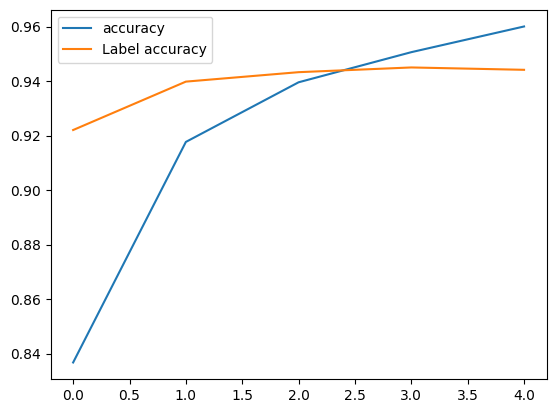

In [73]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="Label accuracy")
plt.legend()
plt.show()

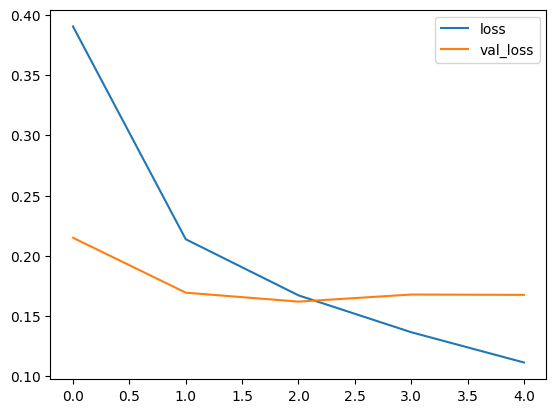

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [90]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "The cost is too much high, But the flight was nice."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 28ms/step
Predicted label:  positive
1/1 [==============================] - 0s 27ms/step
Predicted label:  negative
